<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab5/B40_E22CSEU1183_SANCHIT/LAB_9/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

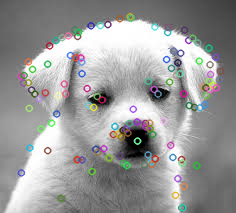

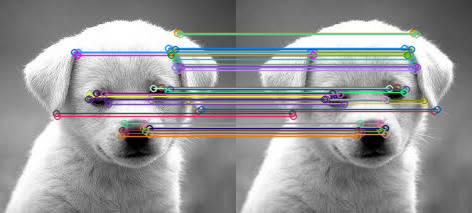

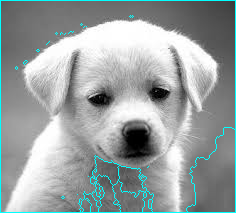

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load images
img1 = cv2.imread('/content/Dog.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/Dog.jpeg', cv2.IMREAD_GRAYSCALE)

# Interest Point Detection using SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Draw keypoints
img1_kp = cv2.drawKeypoints(img1, kp1, None)
img2_kp = cv2.drawKeypoints(img2, kp2, None)

# Feature Matching using ORB and BFMatcher
orb = cv2.ORB_create()
kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1_orb, des2_orb)
matches = sorted(matches, key=lambda x: x.distance)

img_match = cv2.drawMatches(img1, kp1_orb, img2, kp2_orb, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Contour Detection with Custom Seeds
img = cv2.imread('/content/Dog.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Apply watershed
markers = np.zeros_like(gray, dtype=np.int32)
for i, contour in enumerate(contours):
    cv2.drawContours(markers, [contour], -1, (i+1), thickness=-1)

cv2.watershed(img, markers)

# Assign colors to different regions
img[markers == -1] = [255, 255, 0]  # Mark watershed boundaries in red

# Display results in Google Colab
cv2_imshow(img1_kp)
cv2_imshow(img_match)
cv2_imshow(img)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━

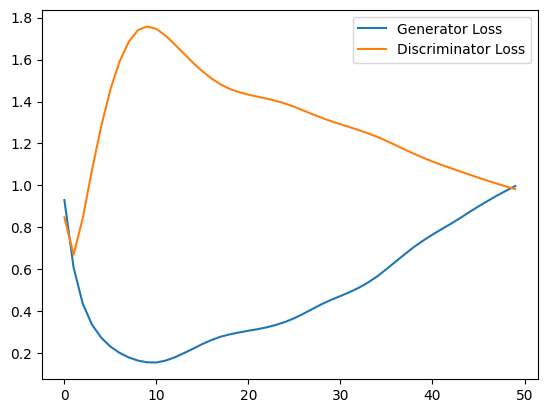

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load datasets
(x_train_mnist, _), _ = mnist.load_data()

# Normalize data
x_train_mnist = (x_train_mnist.astype("float32") - 127.5) / 127.5
x_train_mnist = np.expand_dims(x_train_mnist, axis=-1)

# GAN Models
def build_generator():
    model = tf.keras.Sequential([
        Input(shape=(100,)),
        Dense(128, activation="relu"),
        Dense(784, activation="tanh"),
        Reshape((28, 28, 1))
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(128),
        LeakyReLU(negative_slope=0.2),
        Dense(1, activation="sigmoid")
    ])
    return model

# Instantiate models
generator = build_generator()
discriminator = build_discriminator()

# Compile GAN
gan = tf.keras.Sequential([generator, discriminator])
discriminator.compile(optimizer="adam", loss="binary_crossentropy")
gan.compile(optimizer="adam", loss="binary_crossentropy")

# Training loop
epochs = 50
loss_g = []
loss_d = []

for epoch in range(epochs):
    noise = np.random.normal(0, 1, (128, 100))
    fake_images = generator.predict(noise)
    real_images = x_train_mnist[np.random.randint(0, x_train_mnist.shape[0], 128)]

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((128, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((128, 1)))
    d_loss = 0.5 * (d_loss_real + d_loss_fake)

    # Train generator
    g_loss = gan.train_on_batch(noise, np.ones((128, 1)))

    loss_g.append(g_loss)
    loss_d.append(d_loss)

# Plot loss curves
plt.plot(loss_g, label="Generator Loss")
plt.plot(loss_d, label="Discriminator Loss")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load the Oxford-IIIT Pet Dataset
dataset, info = tfds.load('oxford_iiit_pet', split=['train', 'test'], with_info=True)
IMG_SIZE = 128

# Preprocessing function
def normalize_img_and_mask(image, mask):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    mask = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE))
    mask = tf.where(mask > 0, 1, 0)  # Convert mask to binary (background vs. foreground)
    return image, mask

# Apply preprocessing
train_dataset = dataset[0].map(lambda x: normalize_img_and_mask(x['image'], x['segmentation_mask'])).batch(32)
test_dataset = dataset[1].map(lambda x: normalize_img_and_mask(x['image'], x['segmentation_mask'])).batch(32)

# U-Net Model Definition
def unet_model():
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Encoder (Downsampling)
    conv1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)

    # Decoder (Upsampling)
    up1 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv4)
    conv5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up1)

    up2 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv5)
    conv6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up2)

    up3 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv6)
    conv7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up3)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(conv7)

    model = tf.keras.Model(inputs, outputs)
    return model

# Compile and train the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_dataset, epochs=2, validation_data=test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
IoU Score: 1.0
Dice Coefficient: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


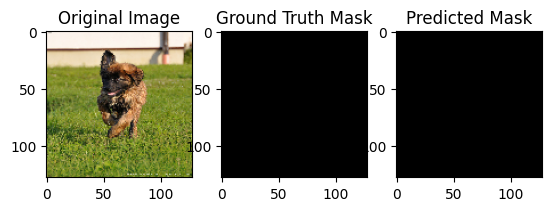

In [5]:
# Evaluate using IoU and Dice Coefficient
def dice_coefficient(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)

    # Cast y_pred_f to the same data type as y_true_f
    y_pred_f = tf.cast(y_pred_f, dtype=y_true_f.dtype)

    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    # Change 2. to 2.0 or tf.constant(2.0) to make it a float
    return (tf.cast(2.0, dtype=y_true_f.dtype) * intersection) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f))

def iou_metric(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)

    # Cast y_pred_f to int32 to match y_true_f
    y_pred_f = tf.cast(y_pred_f, dtype=tf.int32)

    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return intersection / union

# Test evaluation
for images, masks in test_dataset.take(1):
    preds = model.predict(images)
    print(f"IoU Score: {iou_metric(masks, preds).numpy()}")
    print(f"Dice Coefficient: {dice_coefficient(masks, preds).numpy()}")

# Visualizing results
def plot_sample(image, mask, pred):
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[1].imshow(mask.numpy().squeeze(), cmap='gray')
    ax[1].set_title("Ground Truth Mask")
    ax[2].imshow(pred.squeeze(), cmap='gray')
    ax[2].set_title("Predicted Mask")
    plt.show()

for img, mask in test_dataset.take(1):
    pred_mask = model.predict(img)
    plot_sample(img[0], mask[0], pred_mask[0])